<a href="https://www.kaggle.com/code/mh0386/car-price-prediction?scriptVersionId=127248417" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Presentation](https://tome.app/mh0386/revving-up-the-future-ai-powered-used-car-price-predictions-clgtjqlbx17hp1u41lb7yr442)

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

# Data

In [99]:
try:
    data = pd.read_csv('/kaggle/input/cars-dataset-audi-bmw-ford-hyundai-skoda-vw/cars_dataset.csv')
except FileNotFoundError:
    data = pd.read_csv('cars_dataset.csv')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [101]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


## Nulls

In [102]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [103]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')

# Draw

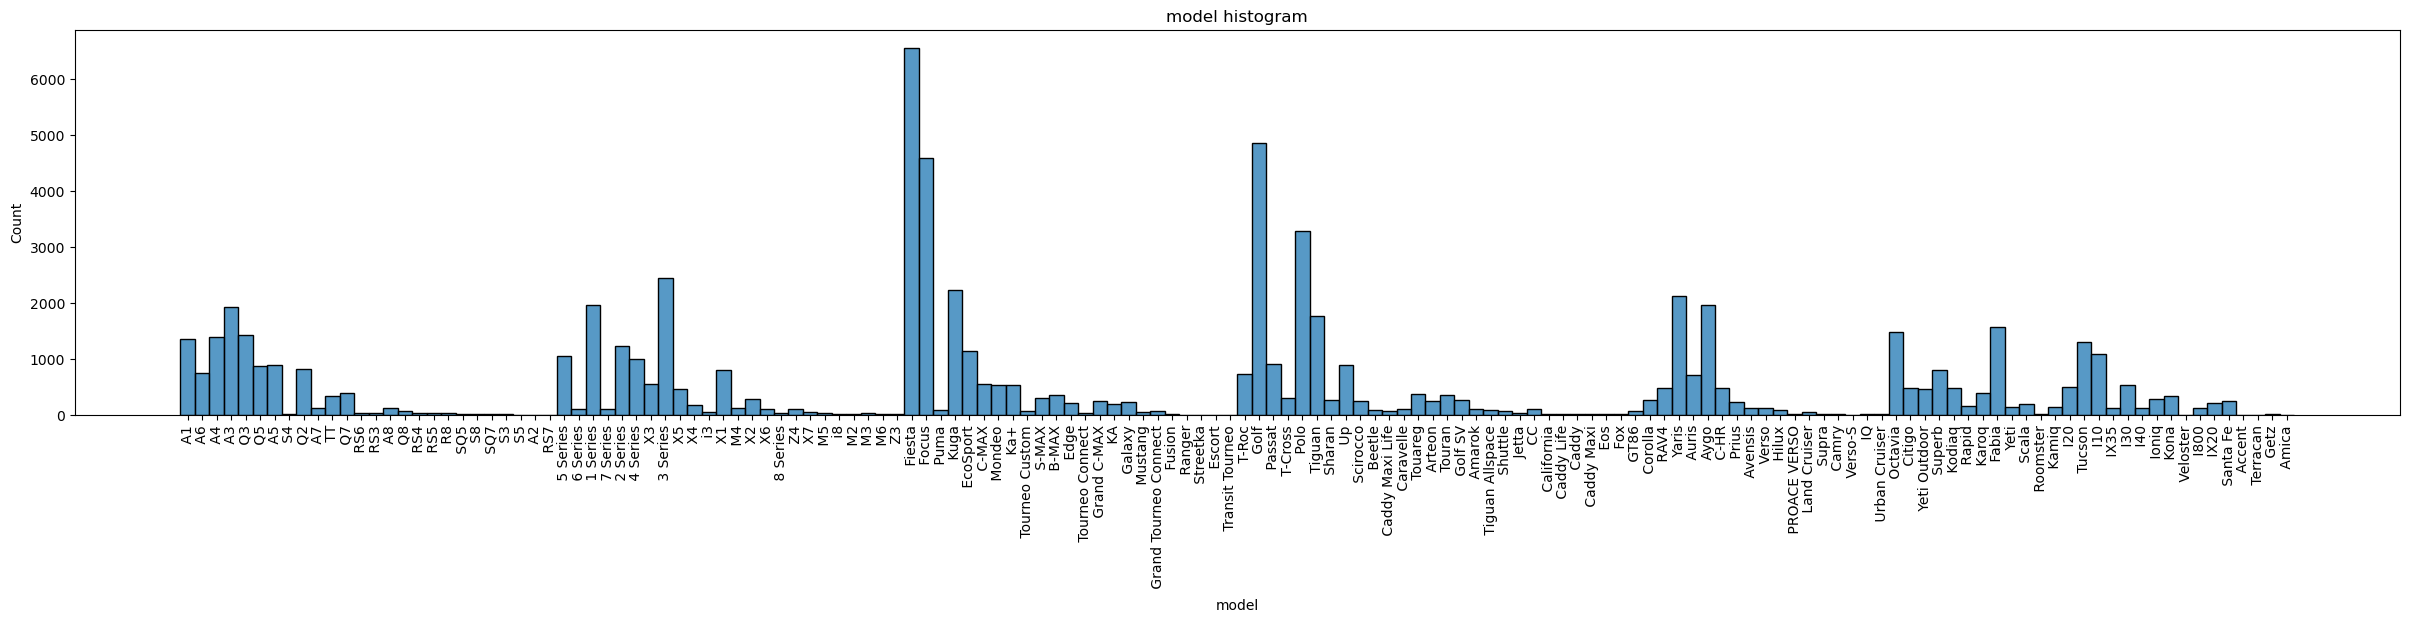

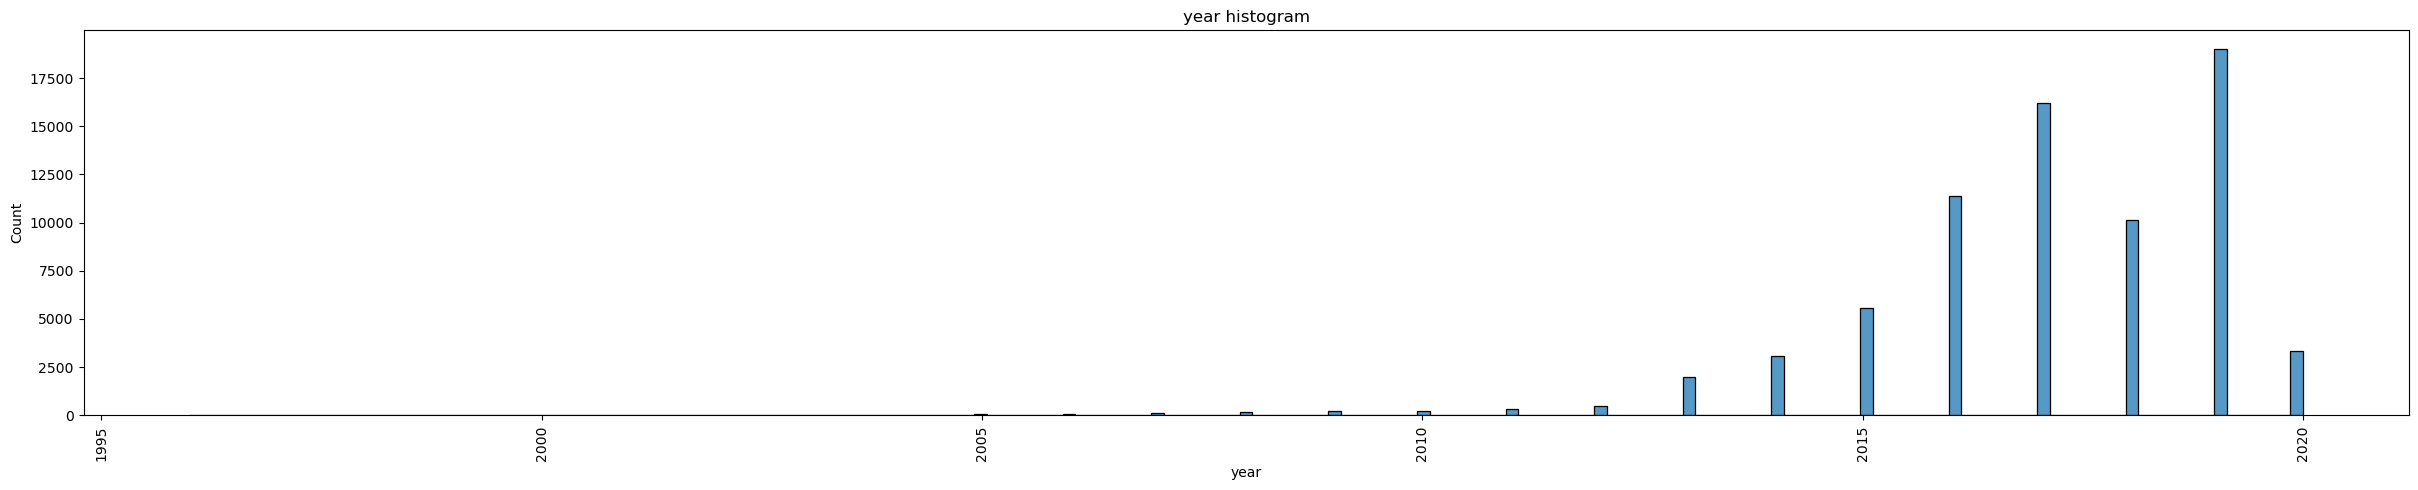

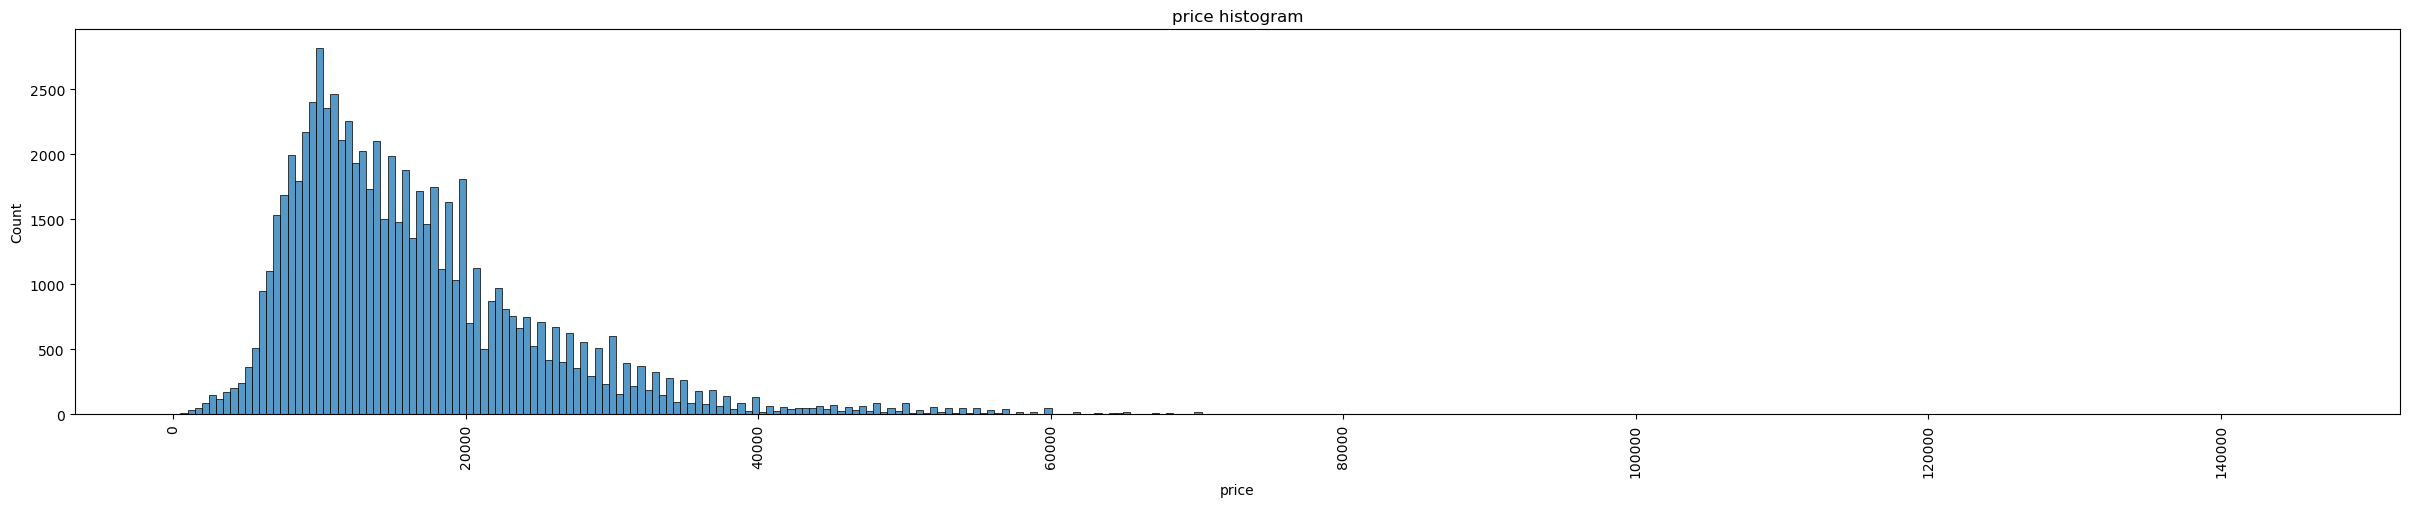

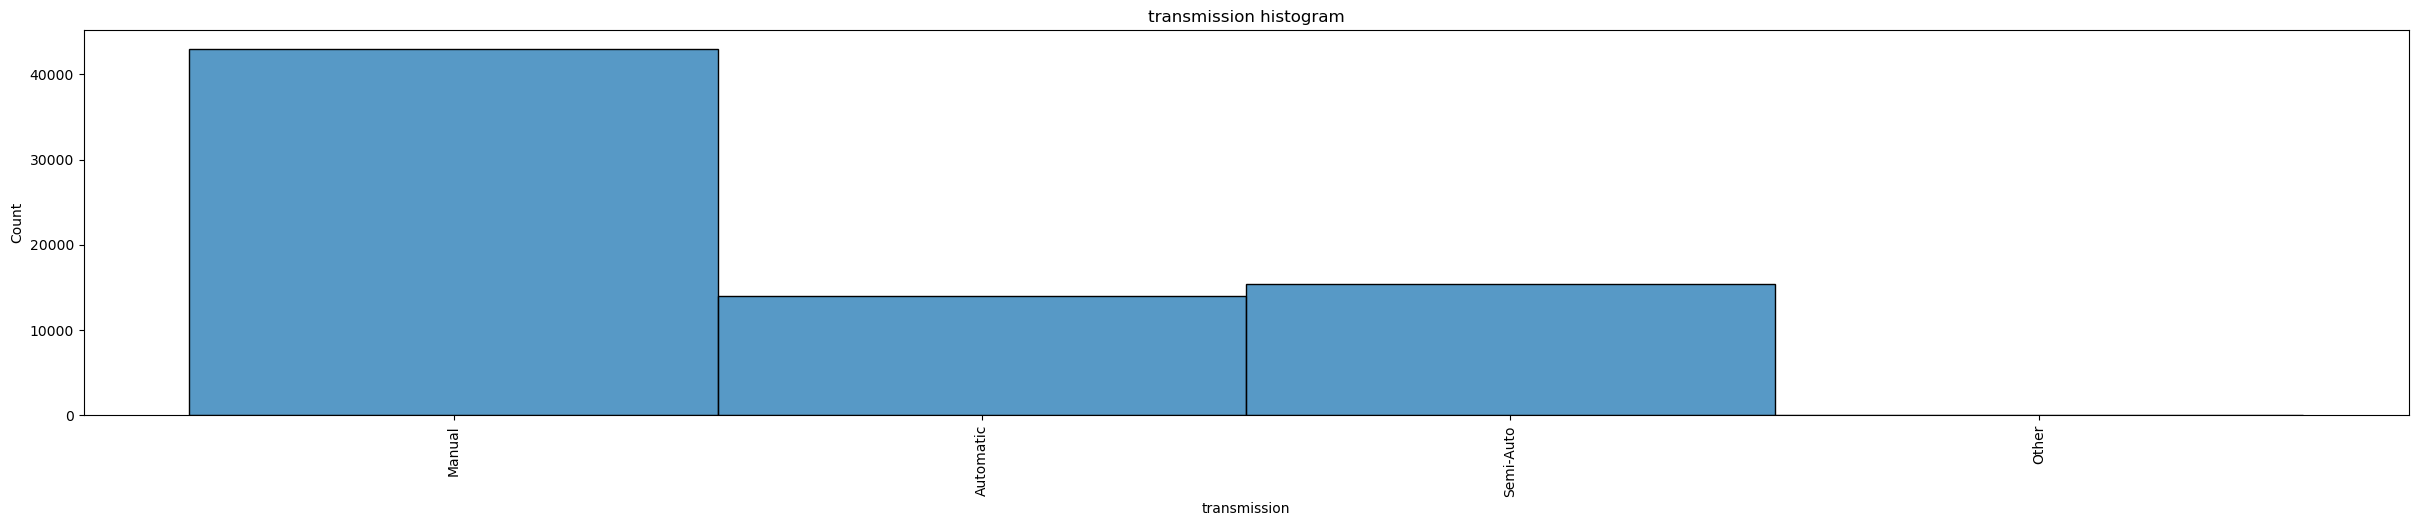

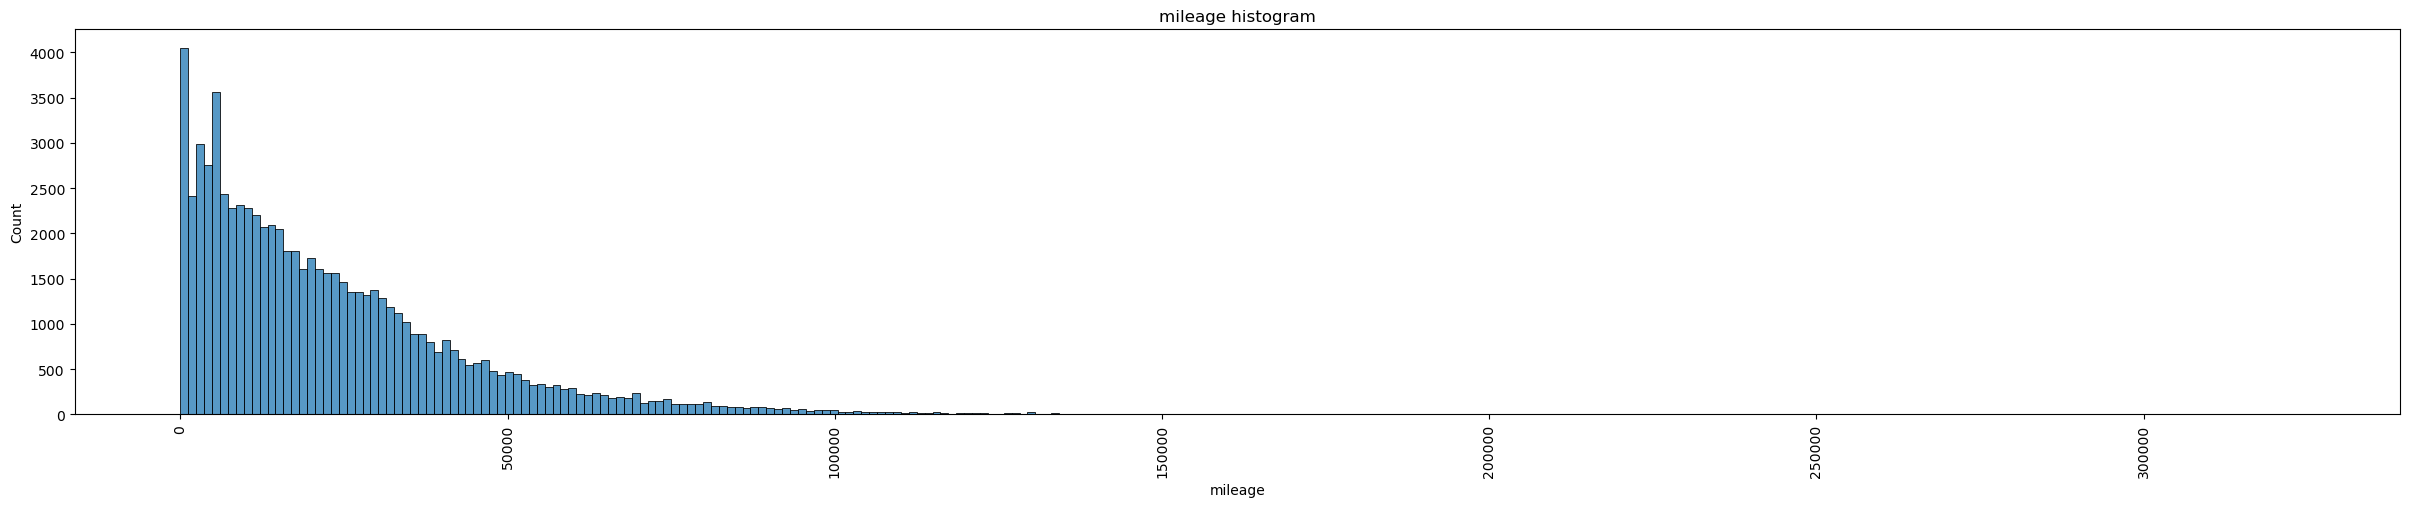

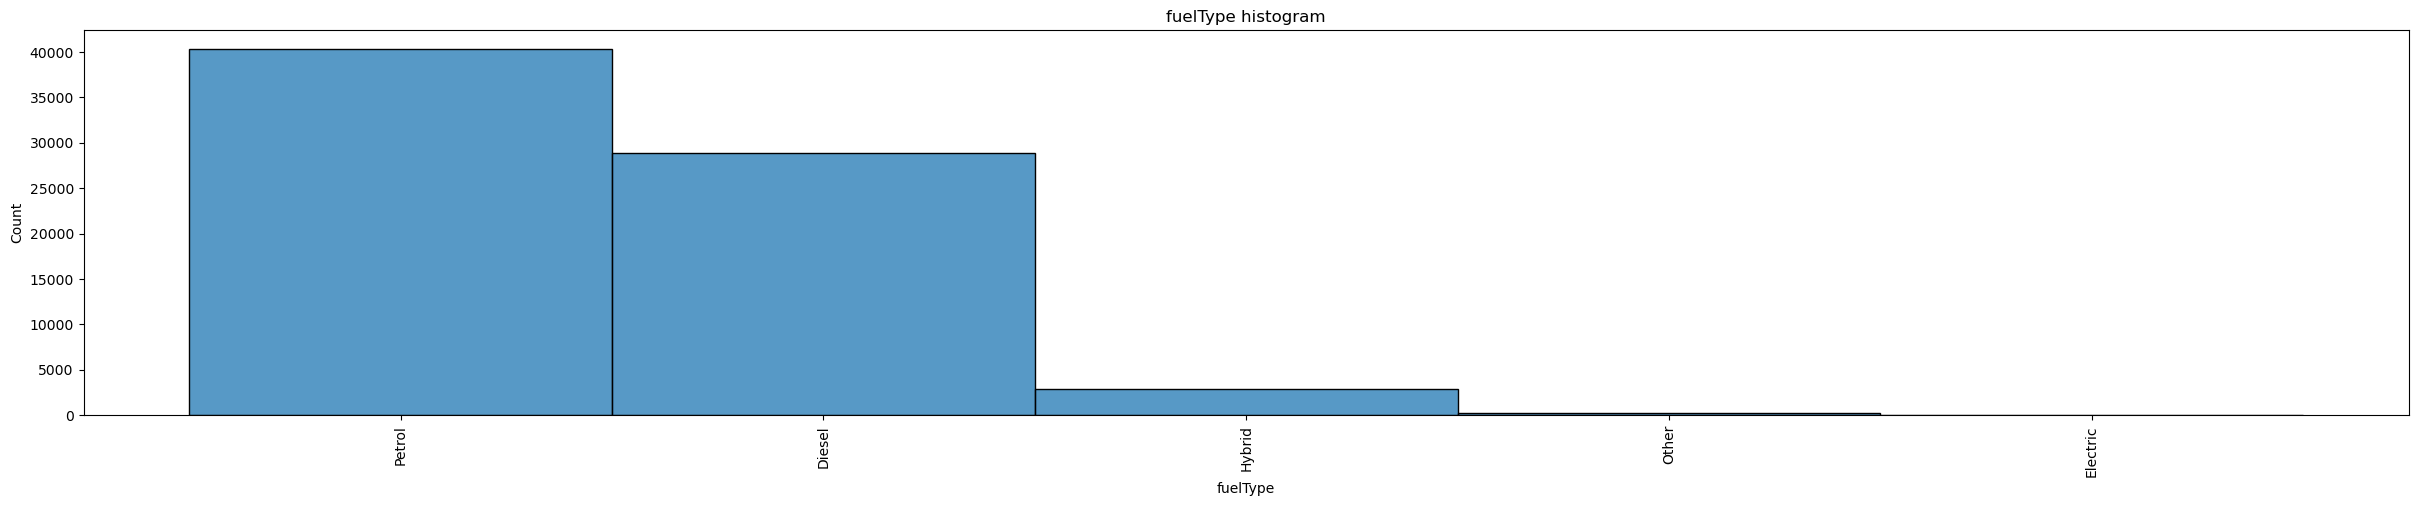

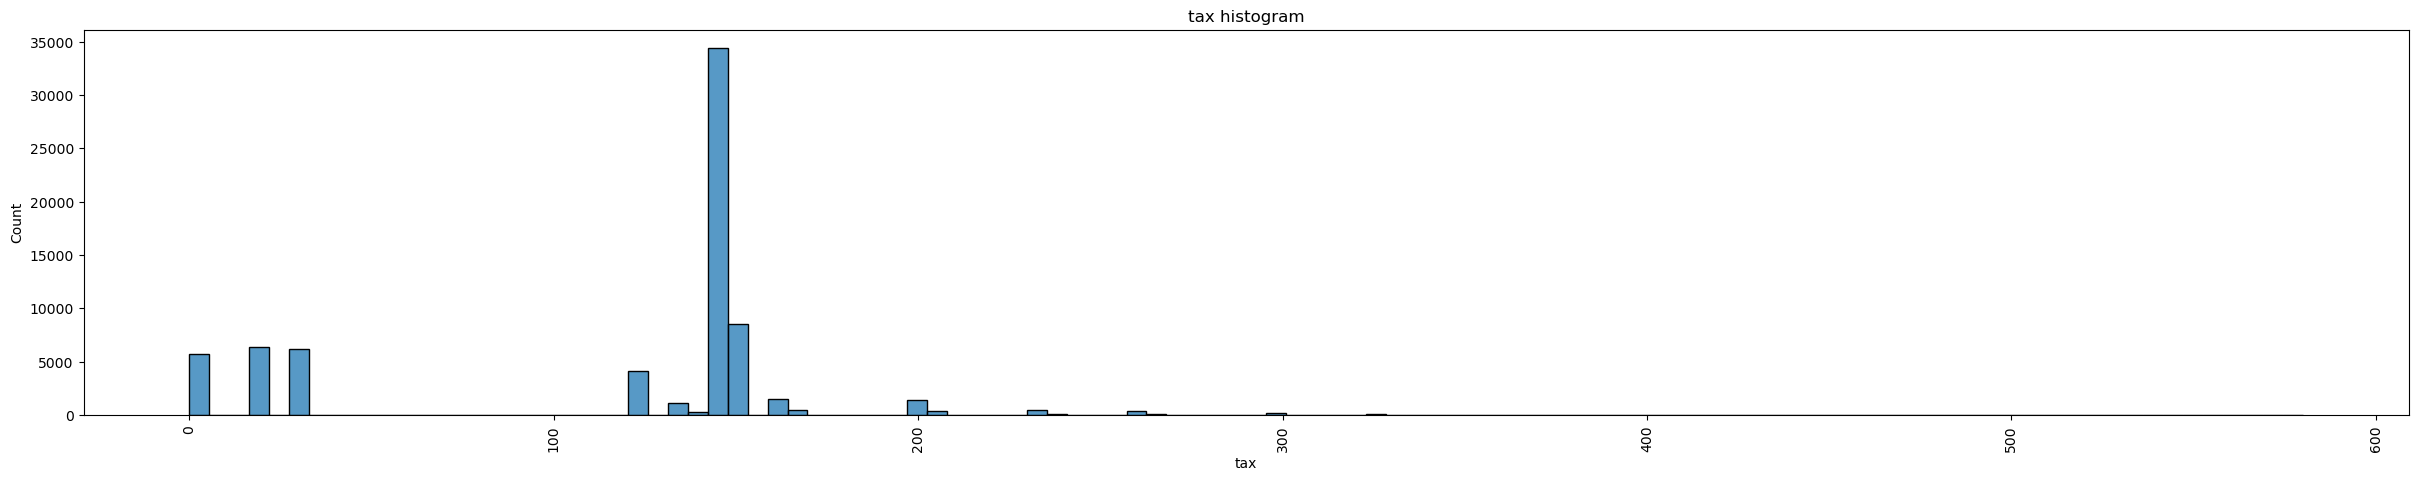

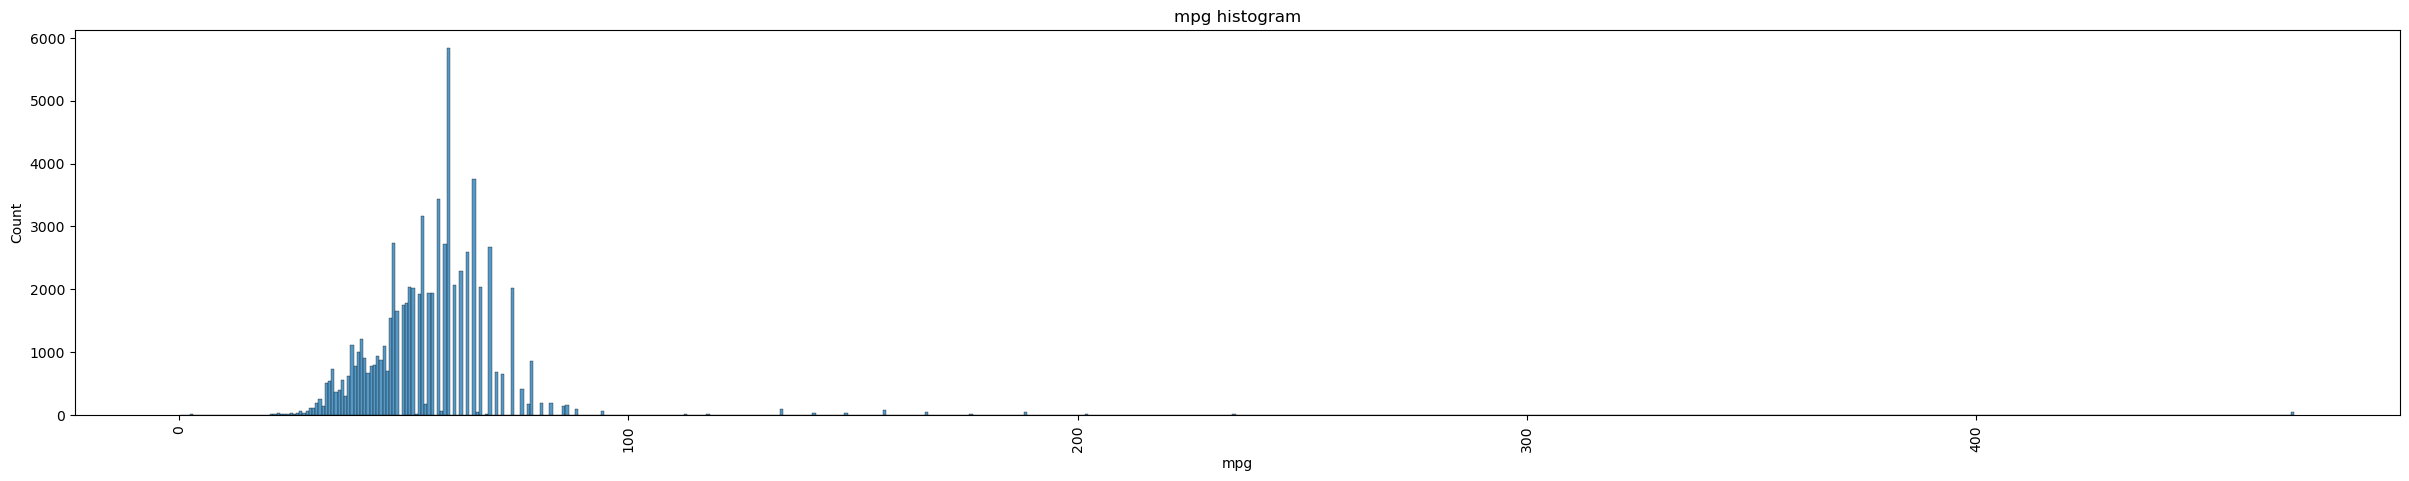

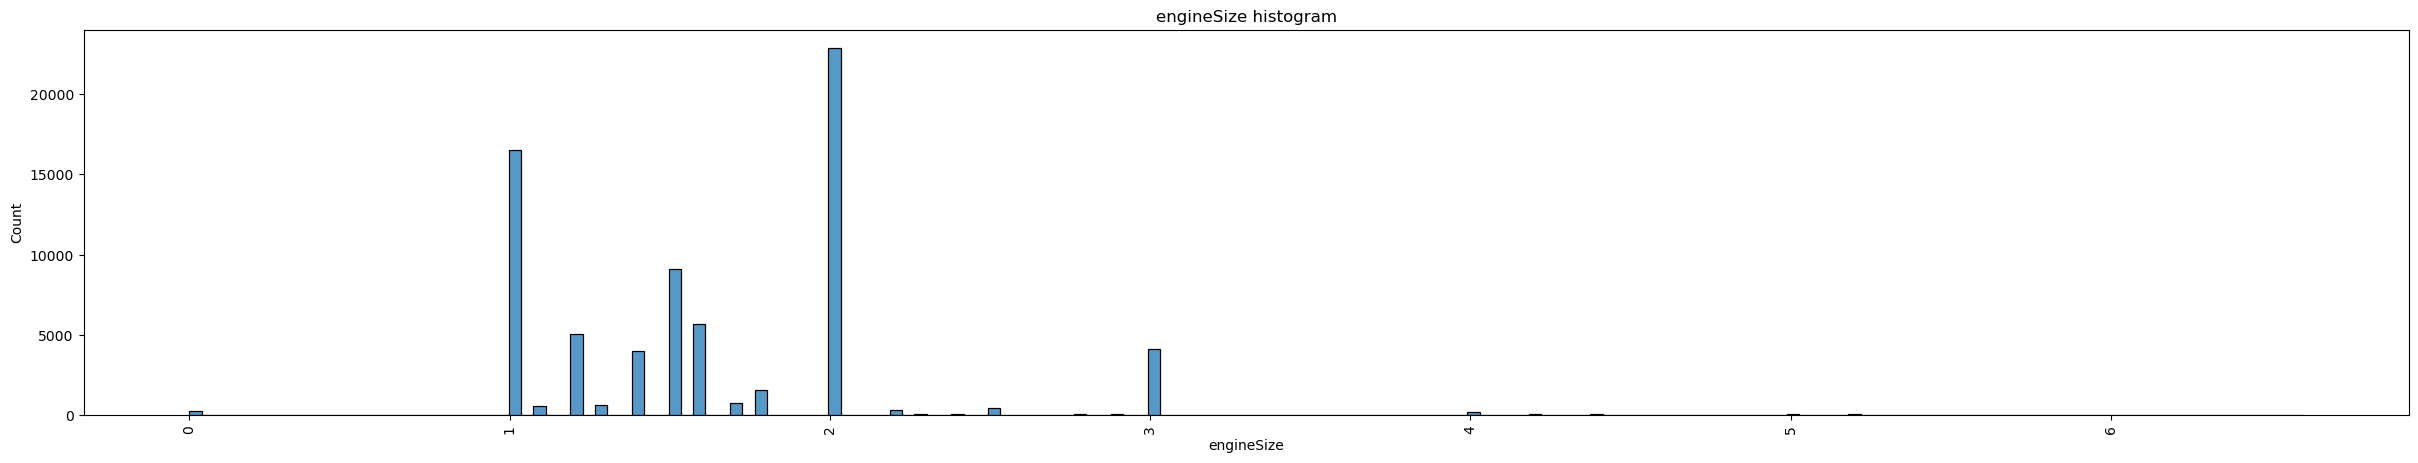

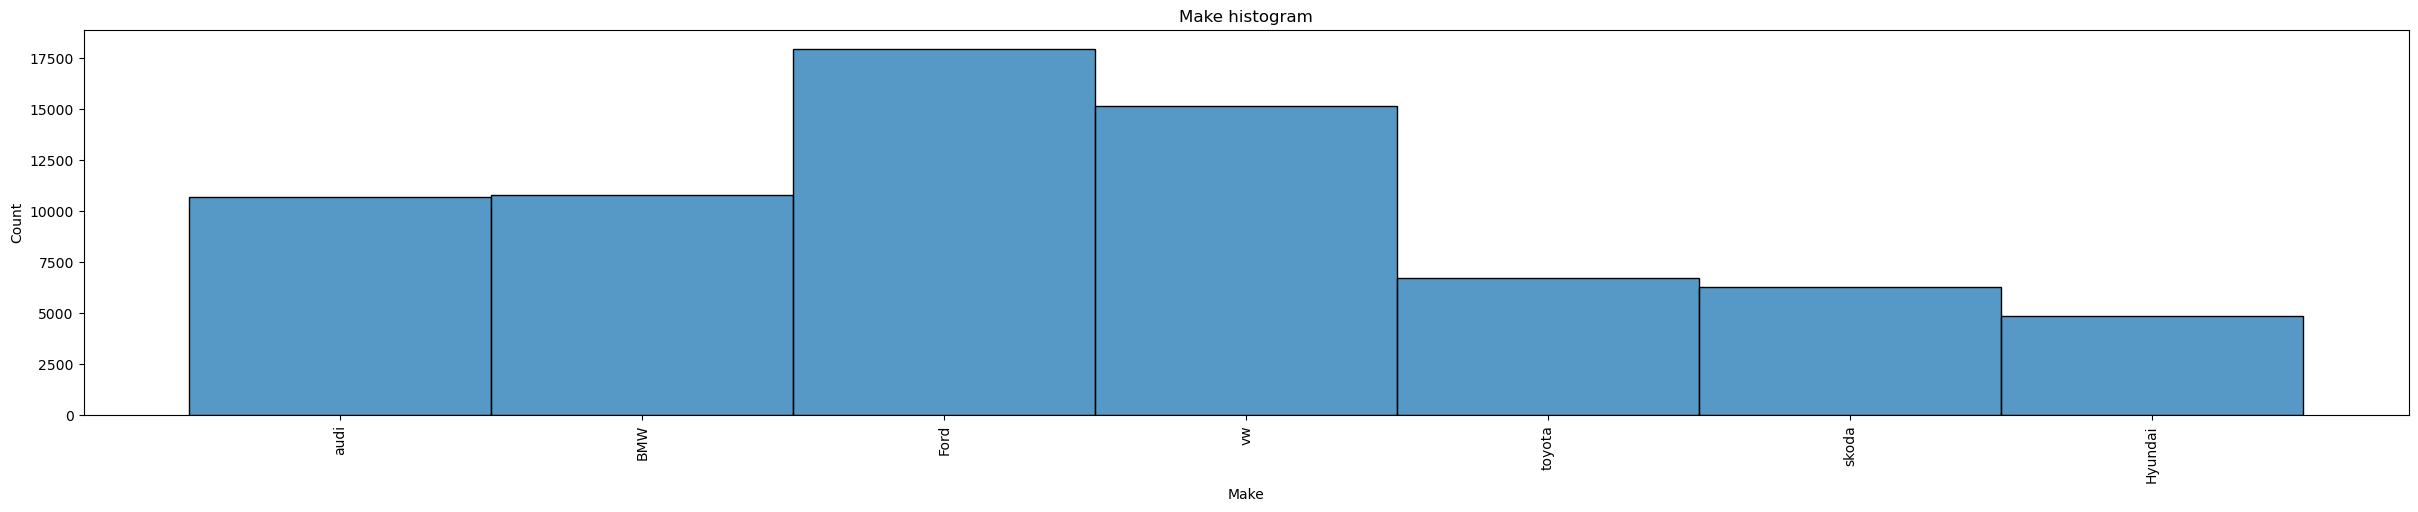

In [104]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(30, 5))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=data, x=col, ax=ax)
    plt.show()

In [105]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [106]:
data.model = preprocessing.LabelEncoder().fit_transform(data.model)
data.transmission = preprocessing.LabelEncoder().fit_transform(data.transmission)
data.fuelType = preprocessing.LabelEncoder().fit_transform(data.fuelType)
data.Make = preprocessing.LabelEncoder().fit_transform(data.Make)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,4,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,4,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,4,145.0,44.8,1.6,2


In [107]:
data.mileage = standardize(data.mileage)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,-0.348853,4,150.0,55.4,1.4,3
1,13,2016,16500,0,0.610673,0,20.0,64.2,2.0,3
2,8,2016,11000,1,0.317349,4,30.0,55.4,1.4,3
3,11,2017,16800,0,0.130113,0,145.0,67.3,2.0,3
4,10,2019,17300,1,-0.992834,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,0.127956,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,1.703195,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,-0.439096,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,0.006398,4,145.0,44.8,1.6,2


In [108]:
data.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
count,72435.000000,72435.000000,72435.000000,72435.000000,7.243500e+04,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,58.453855,2017.073666,16580.158708,1.230358,1.726452e-17,2.319431,116.953407,55.852480,1.635650,2.890702
std,41.229274,2.101252,9299.028754,0.994658,1.000007e+00,1.930699,64.045533,17.114391,0.561535,2.174535
min,0.000000,1996.000000,495.000000,0.000000,-1.086452e+00,0.000000,0.000000,0.300000,0.000000,0.000000
25%,25.000000,2016.000000,10175.000000,1.000000,-7.488510e-01,0.000000,30.000000,47.900000,1.200000,1.000000
50%,49.000000,2017.000000,14495.000000,1.000000,-2.646580e-01,4.000000,145.000000,55.400000,1.600000,3.000000
75%,85.000000,2019.000000,20361.000000,1.000000,4.346877e-01,4.000000,145.000000,62.800000,2.000000,5.000000
max,145.000000,2020.000000,145000.000000,3.000000,1.405552e+01,4.000000,580.000000,470.800000,6.600000,6.000000


# Split

In [109]:
data = shuffle(data)
y = data.price
data.drop('price', axis=1, inplace=True)
X = data

In [110]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
70714,54,2018,1,-0.856041,4,150.0,60.1,1.0,2
31568,37,2018,1,-0.547668,4,145.0,54.3,1.0,1
17042,136,2019,3,-0.581047,0,145.0,33.6,3.0,0
22388,42,2020,1,-1.086265,4,145.0,55.4,1.0,1
57405,139,2017,0,0.089797,4,30.0,55.0,1.3,5
...,...,...,...,...,...,...,...,...,...
7802,87,2012,1,0.803487,0,200.0,43.5,2.0,3
7125,14,2016,3,-0.668570,0,160.0,52.3,3.0,3
26947,42,2018,1,-0.480350,4,145.0,65.7,1.0,1
46983,82,2019,3,-0.933157,4,145.0,39.8,2.0,6


In [111]:
y

70714     8995
31568    14799
17042    61682
22388    18000
57405    10900
         ...  
7802     13590
7125     26950
26947    10391
46983    20485
67091     5495
Name: price, Length: 72435, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

# Multiple Linear Regression

## Train

In [113]:
Model1 = LinearRegression()
Model1.fit(X_train, y_train)

LinearRegression()

## Predict

In [114]:
y_pred1 = Model1.predict(X_test)
y_pred1

array([16542.86684903,  9451.28614619, 17719.1246157 , ...,
       12831.89950825,  6082.20674809, 20286.94185383])

In [115]:
Y_Test_Pred = pd.DataFrame({"Y_Test": y_test, "Y_Pred": y_pred1})
Y_Test_Pred

,Y_Test,Y_Pred
30342,14995,16542.866849
47869,9490,9451.286146
42056,15982,17719.124616
20929,12300,16621.917063
56571,9495,14005.047997
...,...,...
70936,20950,22784.846057
23331,16598,13592.403718
49218,12990,12831.899508
67011,7389,6082.206748


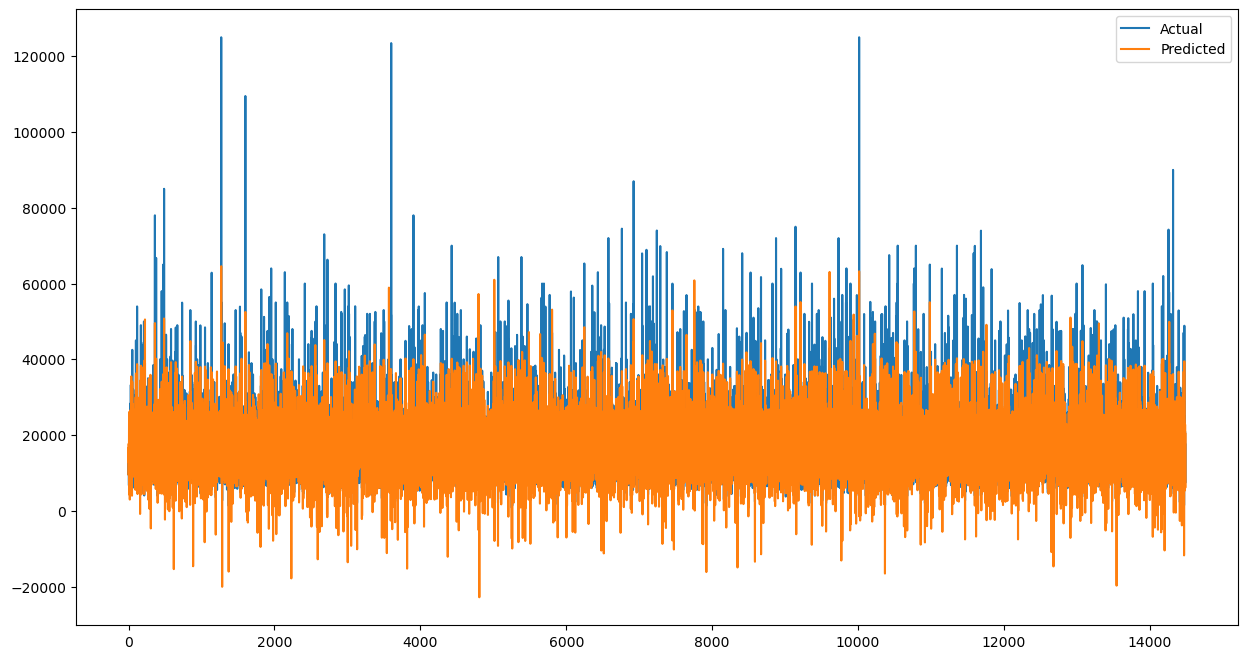

In [116]:
Y_Test_Pred = Y_Test_Pred.reset_index()
plt.figure(figsize=(15, 8))
Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
plt.plot(Y_Test_Pred)
plt.legend(["Actual", "Predicted"])

## R2 Score

In [117]:
r2_score(y_test, y_pred1)

0.7258867833282603

## Mean Squared Error

In [118]:
mean_squared_error(y_test, y_pred1)

24792279.846884318

## Mean Absolute Error

In [119]:
mean_absolute_error(y_test, y_pred1)

3285.862344445514

# Polynomial Regression

## Degree 2

In [127]:
poly = PolynomialFeatures(degree=2)
X_poly2 = poly.fit_transform(X)
X_poly2.shape

(72435, 55)

### Train

In [121]:
Model2 = LinearRegression()
Model2.fit(X_poly2, y)

LinearRegression()

### Predict

In [122]:
y_pred2 = Model2.predict(X_poly2)
y_pred2

array([11507.64501482, 12504.40612951, 47504.53753874, ...,
       10861.47458166, 28985.90685892,  4817.30111712])

In [126]:
y_pred2.shape

(72435,)

In [125]:
Y_Test_Pred2 = pd.DataFrame({"Y_Test": y_test, "Y_Pred": y_pred2})
Y_Test_Pred2

ValueError: array length 72435 does not match index length 14487

In [ ]:
Y_Test_Pred2 = Y_Test_Pred2.reset_index()
plt.figure(figsize=(15, 8))
Y_Test_Pred2 = Y_Test_Pred2.drop(["index"], axis=1)
plt.plot(Y_Test_Pred2)
plt.legend(["Actual", "Predicted"])

### R2 Score

In [ ]:
r2_score(y, y_pred2)

## Mean Squared Error

In [ ]:
mean_squared_error(y, y_pred2)

## Mean Absolute Error

## Mean Absolute Error

In [ ]:
mean_absolute_error(y, y_pred2)

## Degree 3

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly3 = poly.fit_transform(X)
X_poly3

### Train

In [ ]:
Model3 = LinearRegression()
Model3.fit(X_poly3, y)

### Predict

In [ ]:
y_pred3 = Model3.predict(X_poly3)
y_pred3

In [ ]:
Y_Test_Pred = pd.DataFrame({"Y_Test": y_test, "Y_Pred": y_pred3})
Y_Test_Pred

In [ ]:
Y_Test_Pred = Y_Test_Pred.reset_index()
plt.figure(figsize=(15, 8))
Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
plt.plot(Y_Test_Pred)
plt.legend(["Actual", "Predicted"])

### R2 Score

In [ ]:
r2_score(y, y_pred3)

### Mean Squared Error

In [ ]:
mean_squared_error(y, y_pred3)

### Mean Absolute Error

In [ ]:
mean_absolute_error(y, y_pred3)

In [124]:
r2 = []
mse = []
mae = []
for i in range(10):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    Model = LinearRegression()
    Model.fit(X_poly, y)
    y_pred = Model.predict(X_poly)
    print(f'Degree {i}')
    print(f'R2 Score: {r2_score(y, y_pred)}')
    r2.append(r2_score(y, y_pred))
    print(f'Mean Squared Error: {mean_squared_error(y, y_pred)}')
    mse.append(mean_squared_error(y, y_pred))
    print(f'Mean Absolute Error: {mean_absolute_error(y, y_pred)}')
    mae.append(mean_absolute_error(y, y_pred))
    print()

ValueError: could not broadcast input array from shape (72435,9) into shape (72435,0)

In [ ]:
# draw r2 with mse and mae togther
fig, ax = plt.subplots(figsize=(30, 5))
ax.tick_params(axis='x', rotation=90)
plt.title(f'R2 Score')
sns.lineplot(x=range(10), y=r2, ax=ax)
plt.show()

In [ ]:
# draw mse with r2 and mae togther
fig, ax = plt.subplots(figsize=(30, 5))
ax.tick_params(axis='x', rotation=90)
plt.title(f'Mean Squared Error')
sns.lineplot(x=range(10), y=mse, ax=ax)
plt.show()

In [ ]:
# draw mae with r2 and mse togther
fig, ax = plt.subplots(figsize=(30, 5))
ax.tick_params(axis='x', rotation=90)
plt.title(f'Mean Absolute Error')
sns.lineplot(x=range(10), y=mae, ax=ax)
plt.show()

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(range(10), r2, label='R2 Score')
plt.plot(range(10), mse, label='Mean Squared Error')
plt.plot(range(10), mae, label='Mean Absolute Error')
plt.legend()
plt.show()